In [1]:
# importing libraries
import pandas as pd
import numpy as np


In [2]:
# loading data into pandas dataframe 
df = pd.read_csv('data/uci-news-aggregator.csv')

In [3]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [4]:
df.shape

(422419, 8)

In [5]:
# We need only title and category column so we will load this 2 only in dataframe
df = df[['TITLE','CATEGORY']]

In [6]:
df.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [7]:
df.CATEGORY.value_counts()

CATEGORY
e    152469
b    115967
t    108344
m     45639
Name: count, dtype: int64

In [8]:
# Replace category features short data with meaningfull data
df['CATEGORY'] = df['CATEGORY'].replace({"b":"Business","t":"Science and Technology","e":"Entertainment","m":"Health" })

In [9]:
df['CATEGORY'].value_counts()

CATEGORY
Entertainment             152469
Business                  115967
Science and Technology    108344
Health                     45639
Name: count, dtype: int64

In [10]:
df.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",Business
1,Fed's Charles Plosser sees high bar for change...,Business
2,US open: Stocks fall after Fed official hints ...,Business
3,"Fed risks falling 'behind the curve', Charles ...",Business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Business


In [11]:
# News Categories
df['CATEGORY'].unique()

array(['Business', 'Science and Technology', 'Entertainment', 'Health'],
      dtype=object)

In [12]:
df['TITLE'][0]

'Fed official says weak data caused by weather, should not slow taper'

In [13]:
# Headline Tokenization
from nltk.tokenize import sent_tokenize,word_tokenize

tokenized_titles = []

for headline in df['TITLE']:
    tokenized_titles.append(word_tokenize(headline.lower()))

In [14]:
# headlines have been tokenized
for title in tokenized_titles[0:10]:
    print(title)

['fed', 'official', 'says', 'weak', 'data', 'caused', 'by', 'weather', ',', 'should', 'not', 'slow', 'taper']
['fed', "'s", 'charles', 'plosser', 'sees', 'high', 'bar', 'for', 'change', 'in', 'pace', 'of', 'tapering']
['us', 'open', ':', 'stocks', 'fall', 'after', 'fed', 'official', 'hints', 'at', 'accelerated', 'tapering']
['fed', 'risks', 'falling', "'behind", 'the', 'curve', "'", ',', 'charles', 'plosser', 'says']
['fed', "'s", 'plosser', ':', 'nasty', 'weather', 'has', 'curbed', 'job', 'growth']
['plosser', ':', 'fed', 'may', 'have', 'to', 'accelerate', 'tapering', 'pace']
['fed', "'s", 'plosser', ':', 'taper', 'pace', 'may', 'be', 'too', 'slow']
['fed', "'s", 'plosser', 'expects', 'us', 'unemployment', 'to', 'fall', 'to', '6.2', '%', 'by', 'the', 'end', 'of', '2014']
['us', 'jobs', 'growth', 'last', 'month', 'hit', 'by', 'weather', ':', 'fed', 'president', 'charles', 'plosser']
['ecb', 'unlikely', 'to', 'end', 'sterilisation', 'of', 'smp', 'purchases', '-', 'traders']


In [15]:
# Download 'stopwords' from nltk 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Removal of stopwords and punctuations
# Also remove 's

# required libraries
from nltk.corpus import stopwords
import string

# stopwords for English language
stop_words = set(stopwords.words('english'))
print('Stop Words : ',stop_words)

# Punctuations
punctuations = set(string.punctuation)
print("Punctuations : ",punctuations)

Stop Words :  {'her', 'am', 'than', 'they', "she's", 'that', 'a', 'up', 'did', 'if', 'same', 's', "you've", 'very', 'is', 'having', "won't", 'mightn', "don't", "didn't", 'being', "should've", 'm', 'hers', 'whom', 'should', 'at', 'why', 'himself', 'will', 'he', 'doing', 'now', 'so', 'by', "aren't", 'while', 'into', "isn't", 'themselves', 'nor', 'itself', 'what', 'doesn', 'when', "needn't", 'its', 'other', 'y', 'until', "hadn't", 'herself', 'after', "that'll", "haven't", 'll', 'didn', 'i', 'against', 'ourselves', 'them', 'down', 'each', 'between', 'own', 'we', 'o', 'on', 'off', 're', 'd', 'hadn', 'below', 'how', 'most', 'hasn', 've', 'ma', 'who', 'his', 'been', 'shouldn', 'too', 'the', 'for', 'which', 'there', 'was', 'once', 'won', "weren't", 'haven', 'only', 'few', 'all', 'ain', 'to', 'and', 'were', "it's", 'wasn', 'needn', "you're", 'their', 'couldn', 'during', "shouldn't", 'yourselves', 'theirs', 'mustn', 'can', 'she', 'above', 'yours', 'from', 'don', "mustn't", 'with', 'then', 'have'

In [17]:
# Filtered Title = title without stopwords and punctuations
filtered_title = []

for title in tokenized_titles:
    temp_title = []
    for word in title:
        if((word not in stop_words) and (word not in punctuations) and (word != "'s")):
            temp_title.append(word)

    filtered_title.append(temp_title)


print("\nFilter Titles : ")
print(filtered_title[0:5])



Filter Titles : 
[['fed', 'official', 'says', 'weak', 'data', 'caused', 'weather', 'slow', 'taper'], ['fed', 'charles', 'plosser', 'sees', 'high', 'bar', 'change', 'pace', 'tapering'], ['us', 'open', 'stocks', 'fall', 'fed', 'official', 'hints', 'accelerated', 'tapering'], ['fed', 'risks', 'falling', "'behind", 'curve', 'charles', 'plosser', 'says'], ['fed', 'plosser', 'nasty', 'weather', 'curbed', 'job', 'growth']]


In [18]:
# Stemming using Porter stemmer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

Stemmed_titles = []

for title in filtered_title:
    temp_title = []
    for word in title:
        temp_title.append(porter.stem(word))
    
    Stemmed_titles.append(" ".join(temp_title))


print("Stemmed title headlines : \n",Stemmed_titles[0:5])

Stemmed title headlines : 
 ['fed offici say weak data caus weather slow taper', 'fed charl plosser see high bar chang pace taper', 'us open stock fall fed offici hint acceler taper', "fed risk fall 'behind curv charl plosser say", 'fed plosser nasti weather curb job growth']


In [19]:
df.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",Business
1,Fed's Charles Plosser sees high bar for change...,Business
2,US open: Stocks fall after Fed official hints ...,Business
3,"Fed risks falling 'behind the curve', Charles ...",Business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Business


In [20]:
# Replacing Title headlines with stemmed_titles
df = df.drop(['TITLE'],axis=1)
df.insert(0,'Title',Stemmed_titles,True)

In [21]:
df.head()

,Title,CATEGORY
0,fed offici say weak data caus weather slow taper,Business
1,fed charl plosser see high bar chang pace taper,Business
2,us open stock fall fed offici hint acceler taper,Business
3,fed risk fall 'behind curv charl plosser say,Business
4,fed plosser nasti weather curb job growth,Business


In [22]:

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(df[df['CATEGORY']=="Business"]['Title'].str.cat(sep=" "))

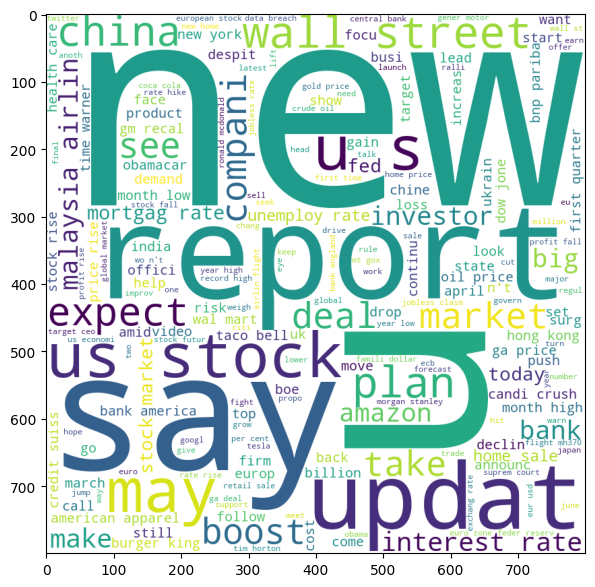

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.imshow(wordcloud)

In [24]:
# Encoding News Categories

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Adding column of Encoded_Category
df['Encoded_Category'] = labelencoder.fit_transform(df['CATEGORY'])



In [25]:
df.head()

,Title,CATEGORY,Encoded_Category
0,fed offici say weak data caus weather slow taper,Business,0
1,fed charl plosser see high bar chang pace taper,Business,0
2,us open stock fall fed offici hint acceler taper,Business,0
3,fed risk fall 'behind curv charl plosser say,Business,0
4,fed plosser nasti weather curb job growth,Business,0


In [26]:
df['CATEGORY'].value_counts()

CATEGORY
Entertainment             152469
Business                  115967
Science and Technology    108344
Health                     45639
Name: count, dtype: int64

In [27]:
df['Encoded_Category'].value_counts()

Encoded_Category
1    152469
0    115967
3    108344
2     45639
Name: count, dtype: int64

In [28]:
# Business : 0
# Entertainment : 1
# Health : 2
# Science and Technology : 3

### Naive Bayes Classifier

In [29]:
# Independent and dependent feature
X = df['Title']
y = df['Encoded_Category']

In [30]:
# Splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split

# Testing set = 25% and Training set = 75%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=51)


In [31]:
print("Shape of X : " + str(X.shape))
print("Shape of y : " + str(y.shape))
print("Shape of X_train : " + str(X_train.shape))
print("Shape of y_train : " + str(y_train.shape))
print("Shape of X_test : " + str(X_test.shape))
print("Shape of y_test : " + str(y_test.shape))

Shape of X : (422419,)
Shape of y : (422419,)
Shape of X_train : (316814,)
Shape of y_train : (316814,)
Shape of X_test : (105605,)
Shape of y_test : (105605,)


**Feature Selection : TF-IDF Approach**

In [32]:
# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Instatiating tfidfvectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fitting and Transforming Traning Data (X_train)
tfidf_x_train = tfidf_vectorizer.fit_transform(X_train.values)

# transforming testing data (X_test)
tfidf_x_test = tfidf_vectorizer.transform(X_test.values)



In [33]:
# Saving tfidf_vectorizer
import pickle
pickle.dump(tfidf_vectorizer,open("pickle_files/tfidf_vectorizer.pkl",'wb'))

In [34]:
tfidf_x_test.shape

(105605, 37450)

In [35]:
# Multinomial Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

# Instantiating Naive Bayes Classifier with alpha = 1.0
nb_classifier = MultinomialNB()

# Fitting nb_classifier to training data 
nb_classifier.fit(tfidf_x_train,y_train)

# Saving nb_classifier for tfidf_vectorizer
pickle.dump(nb_classifier,open("pickle_files/nb_classifier.pkl",'wb'))

In [36]:
# Prediction
pred = nb_classifier.predict(tfidf_x_test)

In [37]:
# Accuracy and Confusion Matrix

from sklearn import metrics

print("Multinomial Naive Bayes : TF-IDF Approach \n")

# Accuracy
a_score = metrics.accuracy_score(y_test,pred)
print("Accuracy : " + str("{:.2f}".format(a_score*100)),'%')

print('\n')

# Confusion matrix
# labels : 0(Business),1(Entertainment),2(Health),3(Science and Technology)
# By default, Horizontally labels are from 0 to 3
# By default, Vertically labels are from 0 to 3
confusion_matrix = metrics.confusion_matrix(y_test,pred)

print("Confusion Matrix: \n",confusion_matrix)

Multinomial Naive Bayes : TF-IDF Approach 

Accuracy : 92.07 %


Confusion Matrix: 
 [[26497   674   175  1845]
 [  530 36828   104   585]
 [  754   685  9586   305]
 [ 1910   690   113 24324]]


In [38]:
# Laplace smoothing (Tunning parameter - alpha)

# List of alphas
alphas = np.arange(0,1,0.1)

# Function for training nb_classifier with different alpha values
def train_and_predict(alpha):
    # instantiating naive bayes classifier
    nb_classifier = MultinomialNB(alpha=alpha)

    # Fitting nb_classifier to training data
    nb_classifier.fit(tfidf_x_train,y_train)
    
    # prediction
    pred = nb_classifier.predict(tfidf_x_test)
    
    # accuracy score
    a_score = metrics.accuracy_score(y_test,pred)

    return a_score


# Iterating over alphas and printing the the corresponding Accuracy score
for alpha in alphas:
    print("Alpha : ",alpha)
    print("Accuracy score : ",train_and_predict(alpha))
    print()


Alpha :  0.0


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Accuracy score :  0.9119454571279769

Alpha :  0.1
Accuracy score :  0.9250603664599214

Alpha :  0.2
Accuracy score :  0.9248899199848492

Alpha :  0.30000000000000004
Accuracy score :  0.9243691113110175

Alpha :  0.4
Accuracy score :  0.9239524643719521

Alpha :  0.5
Accuracy score :  0.9234600634439657

Alpha :  0.6000000000000001
Accuracy score :  0.9227498697978316

Alpha :  0.7000000000000001
Accuracy score :  0.9222006533781545

Alpha :  0.8
Accuracy score :  0.9218218834335495

Alpha :  0.9
Accuracy score :  0.921234790019412



WIth alpha = 1.0, we are getting accuracy of 92%.

Then, Trying different values of alpha, still we are getting approximate accuracy of 92%.

So,we don't need to change the value of alpha = 1.0 

**Feature Selection : Bag of Words (BOW) Approach**

In [39]:
# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer

# Instatiating tfidfvectorizer
count_vectorizer = CountVectorizer()

# Fitting and Transforming Traning Data (X_train)
count_x_train = count_vectorizer.fit_transform(X_train.values)

# transforming testing data (X_test)
count_x_test = count_vectorizer.transform(X_test.values)

# Saving tfidf_vectorizer
pickle.dump(count_vectorizer,open("pickle_files/count_vectorizer.pkl",'wb'))

In [40]:
# Multinomial Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

# Instantiating Naive Bayes Classifier with alpha = 1.0
nb_classifier = MultinomialNB()

# Fitting nb_classifier to training data 
nb_classifier.fit(count_x_train,y_train)

# Saving nb_classifier for tfidf_vectorizer
pickle.dump(nb_classifier,open("pickle_files/nb_classifier_for count_vectorizer.pkl",'wb'))

In [41]:
# prediction
pred = nb_classifier.predict(count_x_test)

In [42]:
# Accuracy and Confusion Matrix

from sklearn import metrics

print("Multinomial Naive Bayes : BOW Approach \n")

# Accuracy
a_score = metrics.accuracy_score(y_test,pred)
print("Accuracy : " + str("{:.2f}".format(a_score*100)),'%')

print('\n')

# Confusion matrix
# labels : 0(Business),1(Entertainment),2(Health),3(Science and Technology)
# By default, Horizontally labels are from 0 to 3
# By default, Vertically labels are from 0 to 3
confusion_matrix = metrics.confusion_matrix(y_test,pred)

print("Confusion Matrix: \n",confusion_matrix)

Multinomial Naive Bayes : BOW Approach 

Accuracy : 92.23 %


Confusion Matrix: 
 [[26272   556   421  1942]
 [  604 36433   303   707]
 [  460   364 10300   206]
 [ 1819   535   284 24399]]


In [43]:
# Laplace smoothing (Tunning parameter - alpha)

# List of alphas
alphas = np.arange(0,1,0.1)

# Function for training nb_classifier with different alpha values
def train_and_predict(alpha):
    # instantiating naive bayes classifier
    nb_classifier = MultinomialNB(alpha=alpha)

    # Fitting nb_classifier to training data
    nb_classifier.fit(count_x_train,y_train)
    
    # prediction
    pred = nb_classifier.predict(count_x_test)
    
    # accuracy score
    a_score = metrics.accuracy_score(y_test,pred)

    return a_score


# Iterating over alphas and printing the the corresponding Accuracy score
for alpha in alphas:
    print("Alpha : ",alpha)
    print("Accuracy score : ",train_and_predict(alpha))
    print()


Alpha :  0.0
Accuracy score :  0.9114719946972207

Alpha :  0.1


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Accuracy score :  0.9251171819516122

Alpha :  0.2
Accuracy score :  0.9244353960513233

Alpha :  0.30000000000000004
Accuracy score :  0.9241607878414848

Alpha :  0.4
Accuracy score :  0.923791487145495

Alpha :  0.5
Accuracy score :  0.9235074096870414

Alpha :  0.6000000000000001
Accuracy score :  0.9233369632119691

Alpha :  0.7000000000000001
Accuracy score :  0.9230528857535154

Alpha :  0.8
Accuracy score :  0.9229392547701339

Alpha :  0.9
Accuracy score :  0.9227214620519861



With alpha = 1.0, we are getting accuracy of 92%.

Then, Trying different values of alpha, still we are getting approximate accuracy of 92%.

So,we don't need to change the value of alpha = 1.0 

In [45]:
# Prediction of user news headline
import pickle

# loading the model
count_vectorizer = pickle.load(open('pickle_files/count_vectorizer.pkl','rb'))
nb_classifier = pickle.load(open("pickle_files/nb_classifier_for count_vectorizer.pkl",'rb'))

In [46]:
# Values encoded by LabelEncoder
encoded = {0:"Business",1:"Entertainment",2:"Health",3:"Science and Technology"}

#input
user_headline = [input("news_headline : ")]

# transformation and Prediction of user headline
headline_counts = count_vectorizer.transform(user_headline)
prediction = nb_classifier.predict(headline_counts)

print("News Category : ",encoded[prediction[0]])

News Category :  Health
